## **Dataset Name:**

Caltech-UCSD Birds-200-2011 (CUB-200-2011)

## **Source (Kaggle):**

https://www.kaggle.com/datasets/veeralakrishna/200-bird-species-with-11788-images

## **Description:**

The CUB-200-2011 dataset is an extended and improved version of the original CUB-200 dataset. It is widely used for fine-grained visual classification (FGVC) tasks — identifying subtle differences among bird species. Each image is labeled with its species, and annotations include bounding boxes, segmentations, and part locations (e.g., beak, wings, tail).

In [1]:
!nvidia-smi

Wed Oct 22 16:49:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chandanchaudhari","key":"6d5a3ab6210e333ed6c92c785566b15e"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Import Dataset From Kaggle and Downlaod
!kaggle datasets download -d veeralakrishna/200-bird-species-with-11788-images
!unzip -q 200-bird-species-with-11788-images.zip -d birds_dataset

Dataset URL: https://www.kaggle.com/datasets/veeralakrishna/200-bird-species-with-11788-images
License(s): CC0-1.0
200-bird-species-with-11788-images.zip: Skipping, found more recently modified local copy (use --force to force download)
replace birds_dataset/CUB_200_2011.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [6]:
!tar -xzf birds_dataset/CUB_200_2011.tgz -C birds_dataset
!ls birds_dataset/CUB_200_2011

attributes	    image_class_labels.txt  parts
bounding_boxes.txt  images		    README
classes.txt	    images.txt		    train_test_split.txt


In [11]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 129.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.


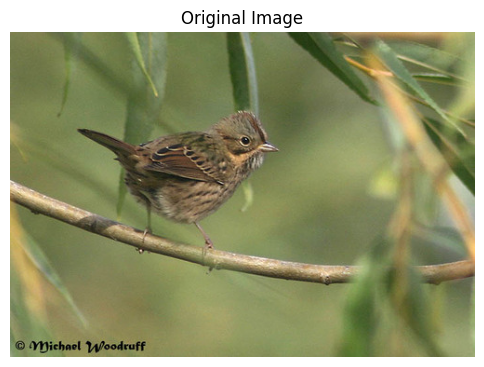

Image Shape (Height, Width, Channels): (350, 500, 3)


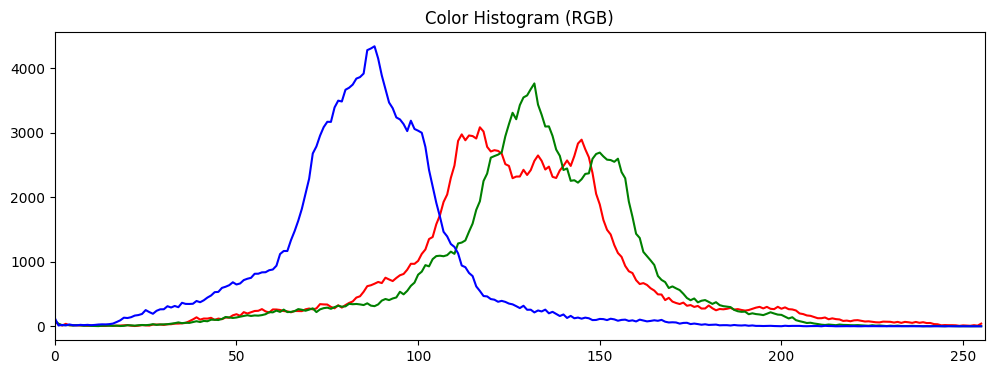

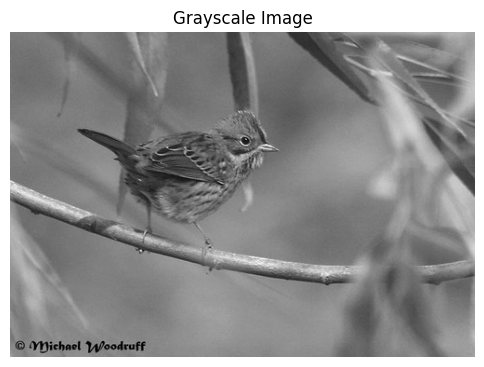

Min Pixel Value: 0
Max Pixel Value: 255
Mean Pixel Value: 115.29333142857143


In [7]:
# -----------------------------
      # Image Processing
# -----------------------------
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

src = "birds_dataset/CUB_200_2011/images"

# Image Analysis
sample_image_path = os.path.join(src, os.listdir(src)[0], os.listdir(os.path.join(src, os.listdir(src)[0]))[0])

# Loading an image using OpenCV
img = cv2.imread(sample_image_path)  # BGR format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Original image
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Image shape
print("Image Shape (Height, Width, Channels):", img.shape)

# Color channels analysis
plt.figure(figsize=(12,4))
colors = ('r','g','b')
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.title("Color Histogram (RGB)")
plt.show()

# Convert to grayscale and show
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Pixel intensity statistics
print("Min Pixel Value:", np.min(img_rgb))
print("Max Pixel Value:", np.max(img_rgb))
print("Mean Pixel Value:", np.mean(img_rgb))

Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        51,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,296,072 (85.05 MB)

 Trainable params: 22,296,072 (85.05 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 68s 207ms/step - accuracy: 0.0066 - loss: 5.2710 - val_accuracy: 0.0185 - val_loss: 5.1043
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - accuracy: 0.0490 - loss: 4.7739 - val_accuracy: 0.0616 - val_loss: 4.6375
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - accuracy: 0.1905 - loss: 3.6955 - val_accuracy: 0.0921 - val_loss: 4.4662
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 37s 125ms/step - accuracy: 0.5761 - loss: 1.7477 - val_accuracy: 0.0882 - val_loss: 6.2311
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 39s 131ms/step - accuracy: 0.8979 - loss: 0.4332 - val_accuracy: 0.0792 - val_loss: 9.1796
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - accuracy: 0.9747 - loss: 0.1085 - val_accuracy: 0.0857 - val_loss: 11.5382
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 39s 131ms/step - accuracy: 0.9835 - loss: 0.0764 - val_accuracy: 0.0732 - val_loss: 11.3040
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 42s 141ms/step - accuracy: 0.9889 - loss:

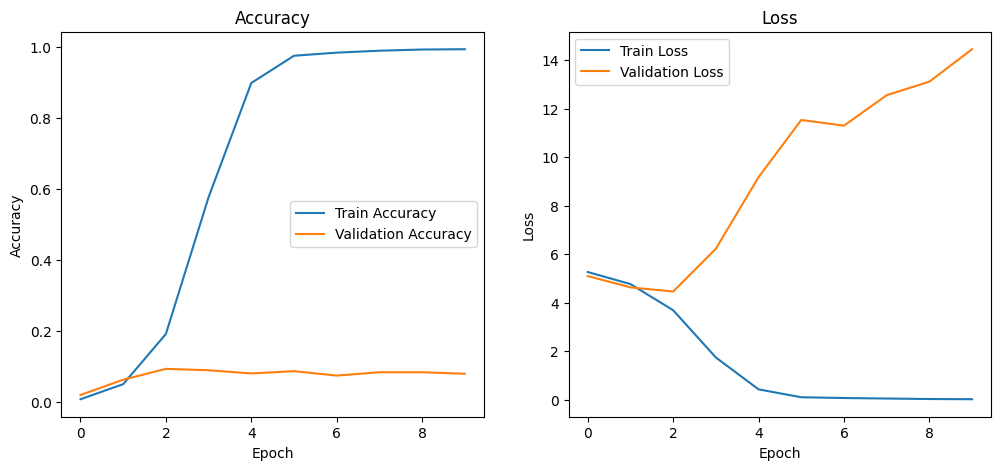

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
Predicted Class: 092.Nighthawk


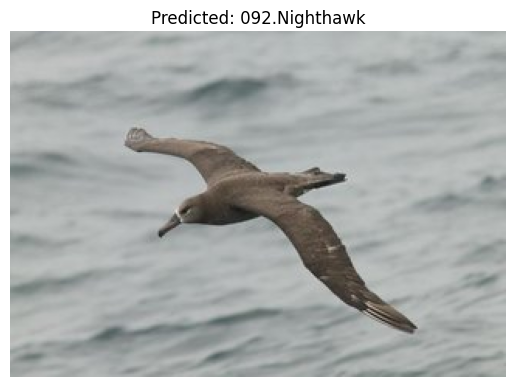

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import cv2

# -----------------------------
# Paths and Config
# -----------------------------
src = "birds_dataset/CUB_200_2011/images"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 200

# -----------------------------
# 1. Image Data Generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    src,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

test_data = test_datagen.flow_from_directory(
    src,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# -----------------------------
# 2. Build CNN Model
# -----------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 3. Train the model
# -----------------------------
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)

# -----------------------------
# 4. Plot Accuracy and Loss
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# -----------------------------
# 5. Predict a single image
# -----------------------------
class_names = list(train_data.class_indices.keys())

def preprocess_image(img_path, img_size=IMG_SIZE):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    return np.expand_dims(img, axis=0)

test_image_path = "birds_dataset/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg"
img_input = preprocess_image(test_image_path)

pred_probs = model.predict(img_input)
pred_idx = np.argmax(pred_probs)
pred_class = class_names[pred_idx]

print("Predicted Class:", pred_class)

# Display image with predicted label
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title("Predicted: " + pred_class)
plt.axis('off')
plt.show()

## **Improving Model Efficiency**

Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_12        │ (None, 224, 224,  │          0 │ input_layer_7[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_6     │ (None, 224, 224,  │          7 │ rescaling_12[0][… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_6[… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,305,771 (16.43 MB)

 Trainable params: 4,263,748 (16.26 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 289s 684ms/step - accuracy: 0.0086 - loss: 5.2910 - val_accuracy: 0.0052 - val_loss: 5.4647
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 139s 469ms/step - accuracy: 0.0227 - loss: 4.8501 - val_accuracy: 0.0103 - val_loss: 5.7716
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 134s 453ms/step - accuracy: 0.0361 - loss: 4.5668 - val_accuracy: 0.0314 - val_loss: 5.0781
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 137s 462ms/step - accuracy: 0.0595 - loss: 4.2907 - val_accuracy: 0.0723 - val_loss: 4.2143
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 136s 460ms/step - accuracy: 0.0871 - loss: 4.0325 - val_accuracy: 0.0878 - val_loss: 4.4955
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 135s 456ms/step - accuracy: 0.1225 - loss: 3.7899 - val_accuracy: 0.1524 - val_loss: 3.5861
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 134s 452ms/step - accuracy: 0.1522 - loss: 3.5734 - val_accuracy: 0.1606 - val_loss: 3.6458
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 143s 481ms/step - accuracy: 0.1789 -

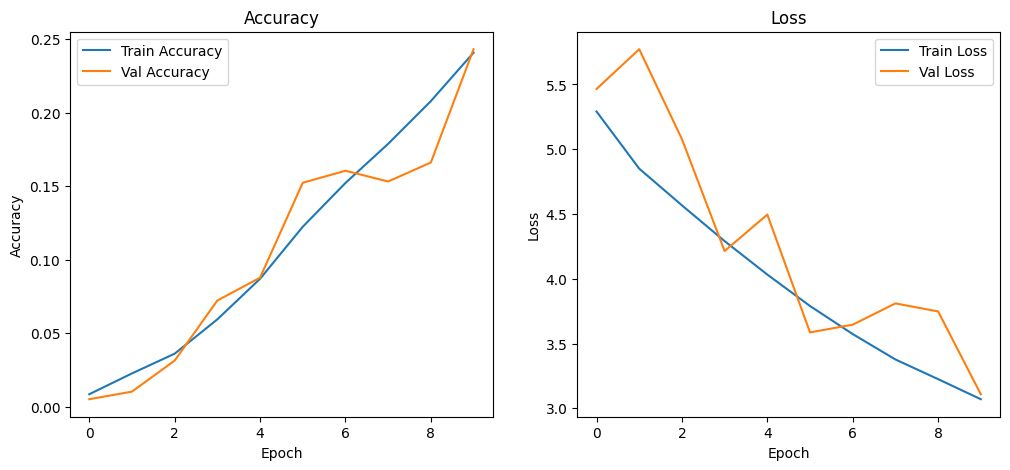

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predicted Class: 072.Pomarine_Jaeger


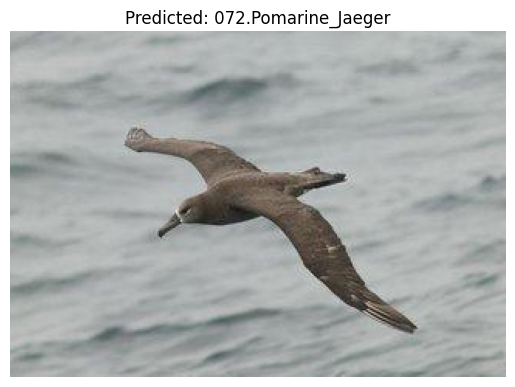

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# -----------------------------
# Paths and Config
# -----------------------------
src = "birds_dataset/CUB_200_2011/images"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 200

# -----------------------------
# 1. Image Data Generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    src,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    color_mode='rgb'
)

val_data = val_datagen.flow_from_directory(
    src,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)

# -----------------------------
# 2. Build EfficientNetB0 FROM SCRATCH (no pretrained weights)
# -----------------------------
base_model = EfficientNetB0(
    weights=None,                # Train from scratch
    include_top=False,
    input_shape=(224,224,3)
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 3. Train Model
# -----------------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

# -----------------------------
# 4. Plot Accuracy & Loss
# -----------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.title("Loss")
plt.show()

# -----------------------------
# 5. Predict Single Image
# -----------------------------
class_names = list(train_data.class_indices.keys())

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    return np.expand_dims(img, axis=0)

test_image_path = "birds_dataset/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg"
img_input = preprocess_image(test_image_path)

pred_probs = model.predict(img_input)
pred_idx = np.argmax(pred_probs)
pred_class = class_names[pred_idx]

print("Predicted Class:", pred_class)

plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title("Predicted: " + pred_class)
plt.axis('off')
plt.show()
